In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pmdarima.arima import auto_arima

In [5]:
data=pd.read_csv(r'C:\Users\HP\Downloads\gld_price_data (2).csv')

data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.shape

(2290, 6)

In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#UNIQUE VALUES IN GOLD COOLUMN 
data.Date.nunique() 

2290

In [10]:
data.SPX.nunique() 

2277

In [11]:
data.GLD.nunique()

1930

In [12]:
data.USO.nunique()

1514

In [13]:
data.SLV.nunique()

1331

In [14]:
data['EUR/USD'].nunique()

2066

In [15]:
numeric_features=data.select_dtypes(include= np.number)

In [16]:
print(numeric_features)

              SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


In [17]:
#we need to find the number of columns which contains numerical values
#for that we need to use loops and conditions because we do not have direct statements to find the data 

In [18]:

numerical_columns=data.select_dtypes(include=np.number).columns.tolist()

In [19]:
print(numerical_columns)

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


In [20]:
print(len(numerical_columns))

5


In [21]:
#numerical_columns.remove('GLD')

In [22]:
print(numerical_columns)

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


In [23]:
len(numerical_columns)

5

In [24]:
#finding discrete numerical features in our data set

In [25]:
corelation=numeric_features.corr()


In [26]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_41584\2593926889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='gold')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

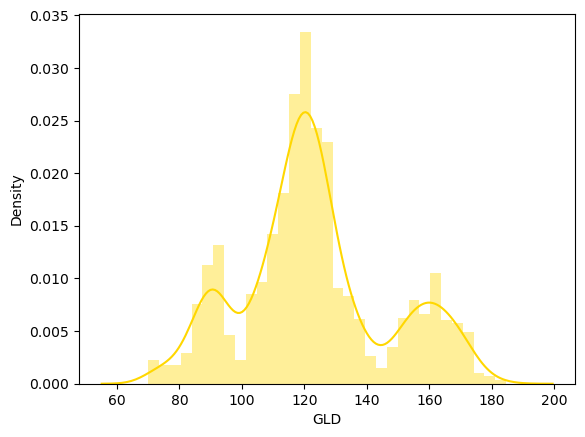

In [27]:
sns.distplot(data['GLD'],color='gold')

C:\Users\HP\AppData\Local\Temp\ipykernel_41584\2856958008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SPX'],color='blue')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SPX', ylabel='Density'>

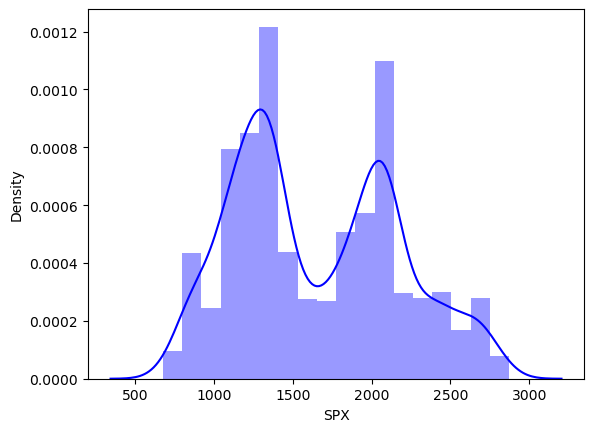

In [28]:
sns.distplot(data['SPX'],color='blue')

C:\Users\HP\AppData\Local\Temp\ipykernel_41584\3885272909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['USO'],color='RED')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='USO', ylabel='Density'>

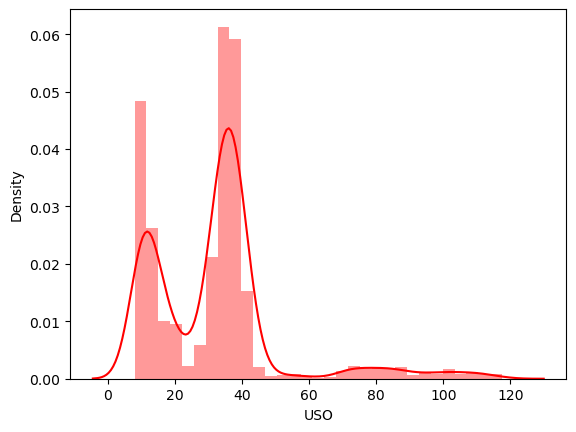

In [29]:
sns.distplot(data['USO'],color='RED')

C:\Users\HP\AppData\Local\Temp\ipykernel_41584\2488429628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SLV'],color='SILVER')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SLV', ylabel='Density'>

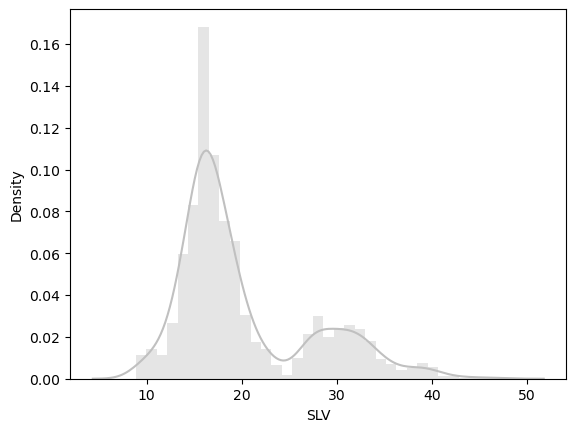

In [30]:
sns.distplot(data['SLV'],color='SILVER')

C:\Users\HP\AppData\Local\Temp\ipykernel_41584\1466919974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EUR/USD'],color='GREEN')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EUR/USD', ylabel='Density'>

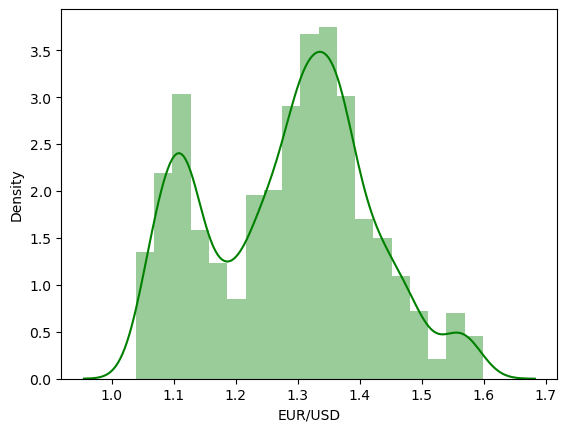

In [31]:
sns.distplot(data['EUR/USD'],color='GREEN')


In [32]:
data['GLD']

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [33]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
#training the model 

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.38839925  81.87859991 115.97839997 127.68650065 120.60000145
 154.58869717 149.72949854 125.99779998 117.56599875 125.9862003
 116.42150103 172.12870037 141.28159824 167.79019779 115.16910007
 117.29320061 139.24930297 170.16270115 159.46070407 155.3336992
 155.10379998 125.14290006 175.89059958 157.13030323 125.16230042
  93.92869988  76.70660013 120.76139986 119.03569908 167.39979994
  88.16120055 125.09939982  90.98430062 117.70910035 121.03459943
 136.13280067 115.40780157 114.84990068 147.70719961 107.36070103
 104.66630241  87.313098   126.38900082 118.07769999 152.98129883
 119.58819983 108.5465996  108.25559828  93.15170045 127.17569769
  74.79260051 113.62349938 121.48250034 111.26839965 119.07149902
 120.42529901 159.69309976 169.57120071 146.75869623  85.88589885
  94.54220042  86.69969942  90.73850014 118.90830094 126.37540097
 127.6278     168.21279967 122.26919952 117.22469908  98.26970036
 168.30780137 142.92089759 132.55020254 121.11110228 121.29009951
 119.7230004

In [42]:
r2 = metrics.r2_score(Y_test,test_data_prediction)

In [43]:
print(r2)

0.9889271854634598


In [44]:
Y_test=list(Y_test)

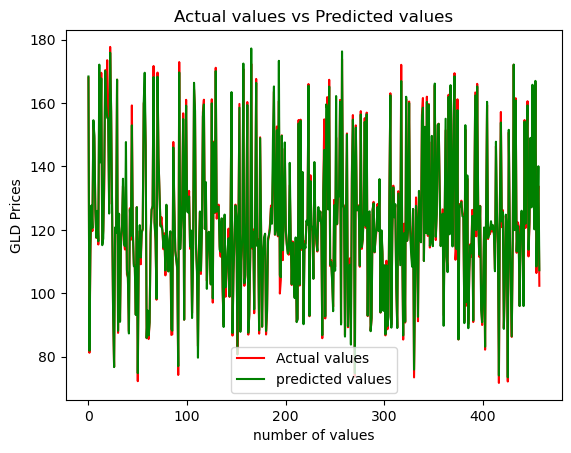

In [45]:
plt.plot(Y_test,color = 'red',label='Actual values')
plt.plot(test_data_prediction,color='green',label='predicted values')
plt.title('Actual values vs Predicted values')
plt.xlabel('number of values')
plt.ylabel('GLD Prices')
plt.legend()
plt.show()
